# This notebook shows how to run the hard-coded 2-step QPS circuits, from QuantumPartonShower_ReM_2step_hardcode.py

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, compiler, circuit, compiler
import math
import time
import matplotlib.pyplot as plt

import QuantumPartonShower as qps
import QuantumPartonShower_ReM as qpsc
import MakeObservables as mo
import classical 

import plotting_old as pl
import plotting as p
import matplotlib

In [3]:
import QuantumPartonShower_ReM_2step_hardcode as qps_rhs

## Define parameters

In [9]:
eps= 0.001
g_1= 2
g_2= 1
#iP= ['100'] # f1
iP= ['101'] # f2

shots= 10000

## Create circuits

In [10]:
qps0= qps_rhs.QuantumPartonShower(g_1, g_2, 0, eps) # for g12= 0
qps1= qps_rhs.QuantumPartonShower(g_1, g_2, 1, eps) # for g12= 1

qc0, qubits0= qps0.createCircuit(iP)
qc1, qubits1= qps1.createCircuit(iP)

Applying step 1.
Applying step 2.
Done.

Applying step 1.
Applying step 2.
Done.



## Simulate circuits and store results

In [11]:
print('Qubits: ' + str(qc0.num_qubits))
print('Gates: ' + str(qc0.count_ops()))

t1= time.time()
counts0= qps0.simulate('qasm', shots=shots)
t2= time.time()
counts1= qps1.simulate('qasm', shots=shots)
t3= time.time()

print('\nTime to simulate withg g12= 0: ' + str(t2-t1))
print('Time to simulate withg g12= 1: ' + str(t3-t2))

Qubits: 12
Gates: OrderedDict([('x', 21), ('cu3', 8), ('measure', 5), ('reset', 3), ('cry', 3), ('cx', 2), ('ry', 1), ('h', 1), ('u3', 1)])

Time to simulate withg g12= 0: 0.7883660793304443
Time to simulate withg g12= 1: 1.4270851612091064


## Some diagnostic plots

0 100 101 110 101 100 af1 f2 f1 30
1 100 101 111 101 100 af2 f2 f1 36
2 000 001 000 001 100 0 phi f1 2
3 100 101 101 111 101 f2 af2 f2 75
4 100 101 101 110 101 f2 af1 f2 80
5 100 101 100 111 101 f1 af2 f2 56
6 100 101 111 100 101 af2 f1 f2 64
7 101 100 001 000 100 phi 0 f1 52
8 100 101 101 110 100 f2 af1 f1 31
9 100 101 100 110 100 f1 af1 f1 105
10 100 101 101 111 100 f2 af2 f1 35
11 100 101 100 111 100 f1 af2 f1 37
12 000 001 000 001 101 0 phi f2 90
13 000 000 000 000 100 0 0 f1 1312
14 101 100 001 000 101 phi 0 f2 566
15 101 101 001 001 101 phi phi f2 402
16 100 101 110 101 101 af1 f2 f2 85
17 100 101 100 110 101 f1 af1 f2 273
18 100 101 111 101 101 af2 f2 f2 66
19 000 000 000 000 101 0 0 f2 5485
20 100 101 111 100 100 af2 f1 f1 29
21 100 101 110 100 100 af1 f1 f1 103
22 101 101 001 001 100 phi phi f1 722
23 100 101 110 100 101 af1 f1 f2 264


/Users/PDeliyannis/Documents/QubitResetDir/QPS_public/plotting_old.py:94: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", nonposy='clip')


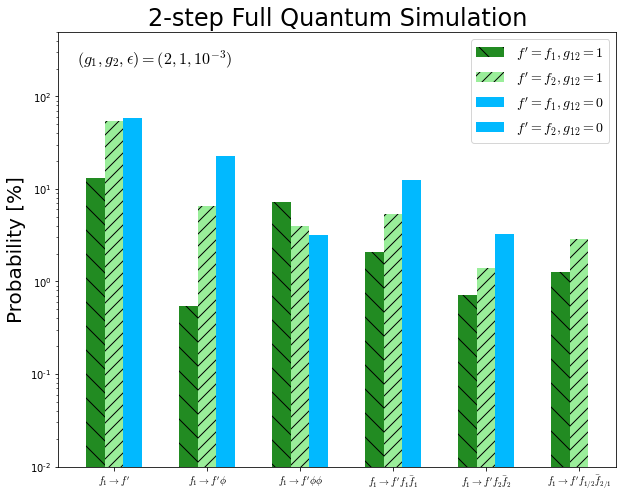

In [12]:
# Note: make sure the first counts parameters is g12=1, and the optional counts2 parameter is g12=0.
#print(counts1)

# Plot the final particle configuration
pl.bar_plot2(counts1, shots, eps, g_1, g_2, counts2= counts0, save=False, wReg=False)

## Another diagnostic plot

ymax= 0.6797


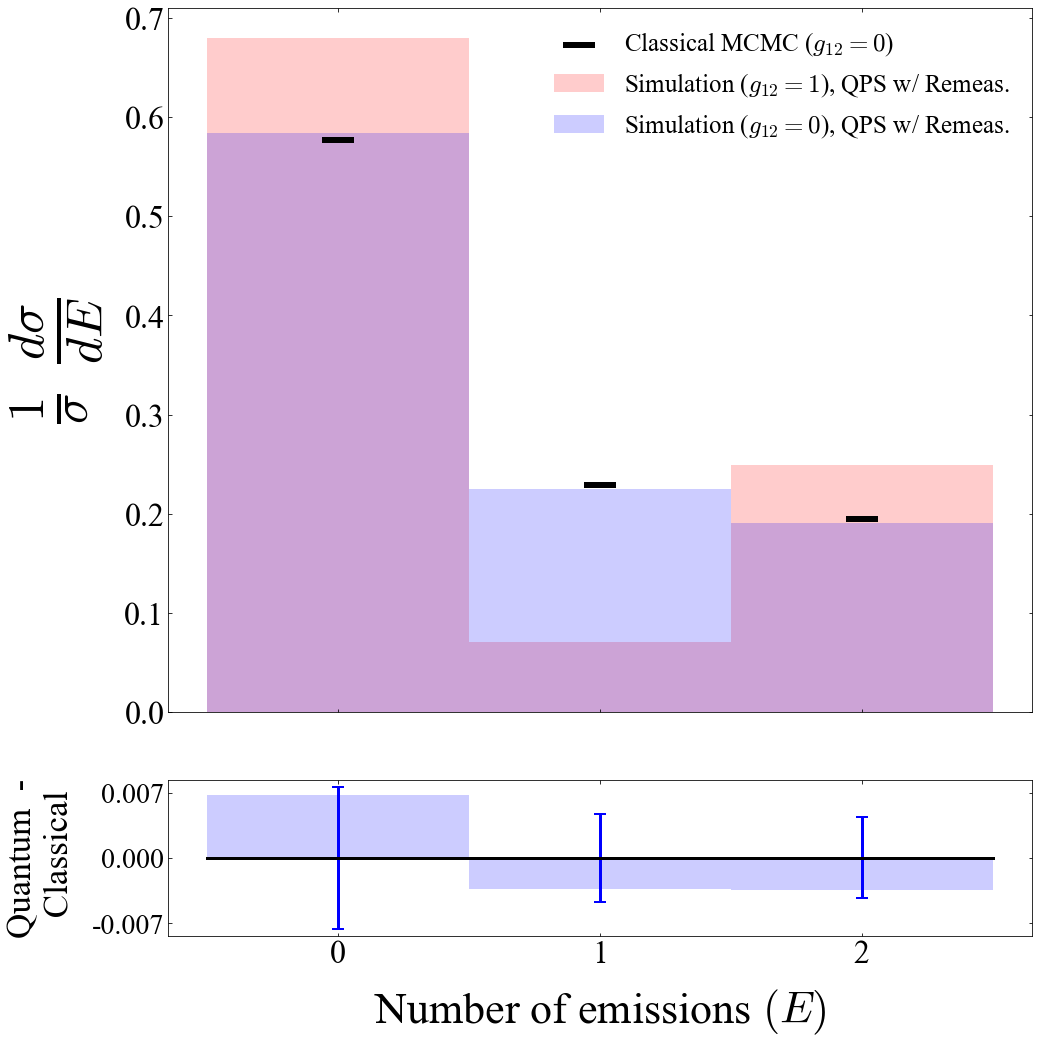

In [16]:
# Note that for the hard-coded circuit, there is no work register wReg, so meake sure
# wmeas= False for the paper plot.
mcmc_shots= int(1e7)
if iP[0] == '100':
    mcmc= np.load('./data/mcmc_%dstep_na=%d_nb=%d_shots=%s.npy' %(2, 1, 0, '{:.0e}'.format(mcmc_shots)))
elif iP[0] == '101':
    mcmc= np.load('./data/mcmc_%dstep_na=%d_nb=%d_shots=%s.npy' %(2, 0, 1, '{:.0e}'.format(mcmc_shots)))

p.master_plot_emissions(eps, g_1, g_2, 2, 1, shots, counts1, counts0, mcmc= mcmc, save=False, old_alg=None, wmeas=False)

## Draw the circuit

In [17]:
qcT= compiler.transpile(qc0, basis_gates=['u3', 'h', 'z', 'y', 'x', 'cx'], optimization_level= 1)
print('Transpiled Gates: ' + str(qcT.count_ops()))
print(qc0.count_ops())
qc0.draw()

Transpiled Gates: OrderedDict([('u3', 31), ('cx', 18), ('x', 17), ('measure', 14), ('reset', 3), ('h', 1)])
OrderedDict([('x', 21), ('measure', 14), ('cu3', 8), ('reset', 3), ('cry', 3), ('cx', 2), ('ry', 1), ('h', 1), ('u3', 1)])


┌───┐┌───────┐┌───┐                  ┌───┐                  ┌───┐     »
    p_0: ┤ X ├┤ Ry(0) ├┤ X ├────────■─────────┤ X ├────────■─────────┤ X ├─────»
         └───┘└──┬─┬──┘└───┘        │         └───┘        │         └───┘     »
    p_1: ────────┤M├────────────────┼──────────────────────┼───────────────────»
         ┌───┐   └╥┘                │                      │                   »
    p_2: ┤ X ├────╫─────────────────┼──────────────────────┼───────────────────»
         └───┘    ║                 │                      │                   »
    p_3: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║                 │                      │                   »
    p_4: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║                 │                      │                   »
    p_5: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║                 │                      │                   »
    p_6: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║                 │                      │                   »
    p_7: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║                 │                      │                   »
    p_8: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║                 │                      │                   »
    h_0: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║                 │                      │                   »
    h_1: ─────────╫─────────────────┼──────────────────────┼───────────────────»
                  ║         ┌───────┴────────┐     ┌───────┴────────┐ ┌─┐      »
      e: ─────────╫─────────┤ U3(1.9112,0,0) ├─────┤ U3(1.0247,0,0) ├─┤M├──|0>─»
                  ║         └────────────────┘     └────────────────┘ └╥┘      »
p0_cl: 3/═════════╩════════════════════════════════════════════════════╬═══════»
                  1                                                    ║       »
p1_cl: 3/══════════════════════════════════════════════════════════════╬═══════»
                                                                       ║       »
p2_cl: 3/══════════════════════════════════════════════════════════════╬═══════»
                                                                       ║       »
h0_cl: 3/══════════════════════════════════════════════════════════════╩═══════»
                                                                       2       »
h1_cl: 3/══════════════════════════════════════════════════════════════════════»
                                                                               »
«                                                 ┌───┐                  ┌───┐»
«    p_0: ──────────────────────────────■─────────┤ X ├────────■─────────┤ X ├»
«                                       │         └───┘        │         └───┘»
«    p_1: ──────────────────────────────┼──────────────────────┼──────────────»
«                                       │                      │              »
«    p_2: ──────────────────────────────┼──────────────────────┼──────────────»
«                         ┌───┐         │                      │              »
«    p_3: ────────────────┤ X ├─────────┼──────────────────────┼──────────────»
«                         └─╥─┘         │                      │              »
«    p_4: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_5: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │                      │              »
«    p_6: ──────────────────╫───────────┼──────────────────────┼──────────────»
«                           ║           │             